Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

Defnining the constants

When omega_o is 400pi

In [2]:
dt = 0.00001
_cycles = 200

_time = np.arange(0, 1, 0.00001)
_omega_o = 2*_cycles * np.pi
_omega_v = 2 * np.pi
_omega_delta = 10 * np.pi
_omega_t = _omega_o + _omega_delta * np.sin(_omega_v * _time)

_angle_t = _omega_t.cumsum() * dt # Angle in radians

In [3]:
_w_omega_t = 2*_cycles*np.pi*_time - 5*np.cos(2*np.pi*_time) +5
_w_omega_t = _w_omega_t


In [4]:
# import numpy as np
import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return idx
    else:
        return idx

In [5]:
"""creating increment values"""

_inc = []
for i in range(_cycles):
    _inc.append(2*np.pi*i)

In [6]:
_twopi_index = []
for idx, i in enumerate(_inc):
    _twopi_index.append(find_nearest(_angle_t, i))

In [7]:
_pi_vals = np.zeros(len(_time))
_est_time = []

for idx, i in enumerate(_twopi_index):
    _pi_vals[i] = _omega_t[i]
    _est_time.append(_time[i])

_pi_vals = np.array(_pi_vals)
_pi_vals = np.where(_pi_vals == 0, np.nan, _pi_vals)

In [8]:
est_vals = []
fill_val = 0
initial_val = 0
# for idx, i in enumerate(_twopi_index):

for idy, j in enumerate(_omega_t):
    # print(_twopi_index[initial_val])
    if idy == _twopi_index[initial_val]:
        initial_val += 1
        est_vals.append(j)
        fill_val = j

        if initial_val == len(_twopi_index):
            break
    else:
        est_vals.append(fill_val)

In [9]:
len(est_vals)

99500

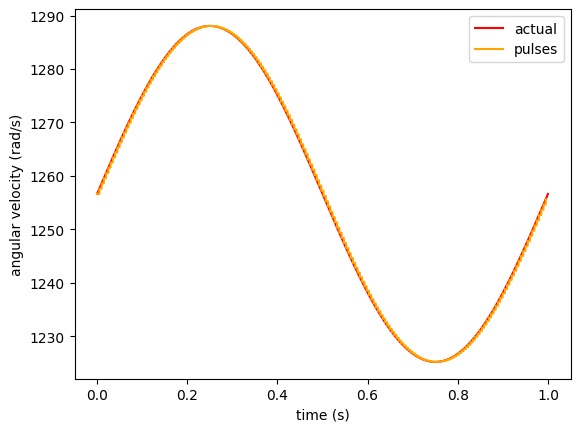

In [12]:
plt.plot(_time, _omega_t, color = 'red', label = 'actual')
# plt.scatter(_time, _pi_vals, s=5, color = 'blue', label = 'estimated')
plt.plot(_time[:len(est_vals)], est_vals, color = 'orange', label = 'pulses')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')
plt.legend()